In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# ### Text analytics in Python
# - NLTK
# - gensim
# - spacy
# - textblob


# - sklearn/keras for preprosession 

In [4]:
reviews

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000HDJXNA,1,What I recieved is not what is pictured here O...,"12 26, 2012",A29YXBFTD7QUP3,HHA,Buyer be ware,1.356480e+09
1,B006KKS7XQ,5,Excellent unit and a pretty simple install usi...,"09 20, 2013",A3IMTXFYD7CGDN,"Peter W. George ""soyflakeman""",high quality without high price,1.379635e+09
2,B002NP8XJ0,5,"I'm enjoying this keyboard, I'm getting anothe...","08 31, 2010",AXNOW20FQKHVW,B. Hayashi,Superb keyboard + solution for slow wake up an...,1.283213e+09
3,B000EITTLE,4,"Overall, this is a fantastic camera that I'm e...","02 3, 2008",A10KCAK279LO0W,"mmcwatters ""macdadi80""",One qualm: not great in low light,1.201997e+09
4,B006CRXK4S,5,These work very well with mySamsung PN64D7000 ...,"01 28, 2012",A19XXLMZXR764J,S. Garfinkle,"Work great, fit well",1.327709e+09
...,...,...,...,...,...,...,...,...
99995,B00008WFVI,5,With a 144-MHz processor this is the fastest P...,"07 10, 2003",A1MJMYLRTZ76ZX,magellan,Great PDA,1.057795e+09
99996,B005FVDTAW,5,If you travel a lot finding the right pair of ...,"11 17, 2011",A3GK1O5S6188AJ,Amy Willingham,Perfect for travel,1.321488e+09
99997,B007S642BW,5,For some reason or another I've always had a l...,"01 31, 2013",A1APK34IJF2IBN,C. Shay,I could hug this hub!,1.359590e+09
99998,B005UBNIF8,1,I bought this sound bar in a Best Buy store fo...,"02 24, 2013",A2CP4MRR7T2YU3,Rafael T.,What was Amazing Sound is now a piece of JUNK!!!,1.361664e+09


## Stop Words

In [36]:
from gensim.parsing.preprocessing import remove_stopwords

In [46]:
# http://jmcauley.ucsd.edu/data/amazon/
# Only taking 10000 reviews
reviews = pd.read_csv('data/amazon_reviews_big.csv').sample(10000)
print(reviews.shape)
reviews.head()

(10000, 8)


,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
5873,B003D8GAA0,5,Compared these to a co-worker's $50 one bought...,"02 4, 2013",A2F9I7CI9GWANO,Import Exec,Exact Same Quality as The Product in the Bigge...,1.359936e+09
3025,B000I68BD4,5,Sound Quality: Sony MDR-AS20J[by a long margi...,"10 20, 2012",A22O3C1YBIICP,M. Hamilton,Low price earbuds using a consumer grade source.,1.350691e+09
13239,B000C77XSS,2,I currently am using a WRT54GS with a WRE54G i...,"03 1, 2006",A3NMVOK0IY10OF,Eric G. Hanson,WRT54GX4 should not have been sold as is,1.141171e+09
33231,B004E48D48,5,"It's cute, it protects, it's not too chunky. ...","12 24, 2012",AO8RJE8TIFJZA,"PaganDeva2000 ""pagandeva2000""",Fine For iPod,1.356307e+09
65615,B008R5SFT8,2,I ordered a 6FT. cable off eBay a few months a...,"05 18, 2013",A6H2C3IPC0J9Q,Colin Reynolds,Great Charging Cable For A Week!,1.368835e+09


In [47]:
docs = reviews['reviewText'].fillna('NA').str.lower().str.replace('[^a-z\s]', '')
docs

<ipython-input-47-eb9b99f2f065>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  docs = reviews['reviewText'].fillna('NA').str.lower().str.replace('[^a-z\s]', '')


5873     compared these to a coworkers  one bought at t...
3025     sound quality  sony mdrasjby a long marginalmo...
13239    i currently am using a wrtgs with a wreg in a ...
33231    its cute it protects its not too chunky  i lov...
65615    i ordered a ft cable off ebay a few months ago...
                               ...                        
80337    i picked this case up to put me over the free ...
48386    everyhing for the most part is great with this...
42515    i really like this unit especially hd picture ...
81052    it may have bad reviews but i think i fixed th...
90828    love it plug and play sweet for the bedroom tv...
Name: reviewText, Length: 10000, dtype: object

In [48]:
docs = docs.apply(remove_stopwords)
docs

5873     compared coworkers bought big blue yellow reta...
3025     sound quality sony mdrasjby long marginalmost ...
13239    currently wrtgs wreg plaster wall building occ...
33231    cute protects chunky love ipod touch spend mon...
65615    ordered ft cable ebay months ago unfortunately...
                               ...                        
80337    picked case free shipping cost order regret ca...
48386    everyhing great case thing dont like locks smo...
42515    like unit especially hd picture believe nice p...
81052    bad reviews think fixed problem super gorilla ...
90828    love plug play sweet bedroom tv recommend look...
Name: reviewText, Length: 10000, dtype: object

In [56]:
reviews['sentiment'] = reviews['overall'].apply(lambda v: 'positive' if v>=3 else 'negative')
reviews

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,sentiment
5873,B003D8GAA0,5,Compared these to a co-worker's $50 one bought...,"02 4, 2013",A2F9I7CI9GWANO,Import Exec,Exact Same Quality as The Product in the Bigge...,1.359936e+09,positive
3025,B000I68BD4,5,Sound Quality: Sony MDR-AS20J[by a long margi...,"10 20, 2012",A22O3C1YBIICP,M. Hamilton,Low price earbuds using a consumer grade source.,1.350691e+09,positive
13239,B000C77XSS,2,I currently am using a WRT54GS with a WRE54G i...,"03 1, 2006",A3NMVOK0IY10OF,Eric G. Hanson,WRT54GX4 should not have been sold as is,1.141171e+09,negative
33231,B004E48D48,5,"It's cute, it protects, it's not too chunky. ...","12 24, 2012",AO8RJE8TIFJZA,"PaganDeva2000 ""pagandeva2000""",Fine For iPod,1.356307e+09,positive
65615,B008R5SFT8,2,I ordered a 6FT. cable off eBay a few months a...,"05 18, 2013",A6H2C3IPC0J9Q,Colin Reynolds,Great Charging Cable For A Week!,1.368835e+09,negative
...,...,...,...,...,...,...,...,...,...
80337,B008IEGS9W,4,I picked this case up to put me over the free ...,"01 13, 2014",A1I0MQXZ3IFO38,Jason Lee,"Good protection, easy to install and remove, a...",1.389571e+09,positive
48386,B00063E26Y,4,Everyhing for the most part is great with this...,"06 28, 2013",A23FM0S3J3JYAL,KRISTOFFER FEATHERINGHAM,Not bad... not the best,1.372378e+09,positive
42515,B00067TYFO,4,I really like this unit especially HD picture....,"01 17, 2006",A24T3SNUM6R0OM,Amazon buyer,Good product. Lousy remote,1.137456e+09,positive
81052,B0029L047W,5,It may have bad reviews but I think I fixed th...,"07 18, 2013",ASWVPJK2BJKOA,Brian sazo,Hahaha I am so smart,1.374106e+09,positive


In [12]:
# Usage of remove_stopwords
remove_stopwords('this movie is really good')

'movie good'

## Stemming

from nltk.stem import PorterStemmer: This will loop through one word at a time, very slow and need logic to complete all the words and documents <br>
Or <br>
from gensim.parsing.porter import PorterStemmer: this is done by passing all the documents at one go

In [50]:
from nltk.stem import PorterStemmer

In [51]:
nltk_stemmer = PorterStemmer()
nltk_stemmer.stem('looking'), nltk_stemmer.stem('looks'), nltk_stemmer.stem('looked')

('look', 'look', 'look')

In [52]:
# Root form might not be dictionary word, this could
nltk_stemmer.stem('orginization'), nltk_stemmer.stem('president')

('orgin', 'presid')

In [53]:
from gensim.parsing.porter import PorterStemmer

In [54]:
stemmer = PorterStemmer()
docs = reviews['reviewText'].fillna('NA').str.lower().str.replace('[^a-z\s]', '')
docs = docs.apply(remove_stopwords)
docs = stemmer.stem_documents(docs)
docs

<ipython-input-54-818eb10c4b3f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  docs = reviews['reviewText'].fillna('NA').str.lower().str.replace('[^a-z\s]', '')


['compar cowork bought big blue yellow retail exactli needless wasnt happi awesom bui sure dampen sheet screen littl steam bathroom appli door close bubbl easi applic',
 'sound qualiti soni mdrasjbi long marginalmost tiedpanason slimz rphjek jbud origin iluv citi light epnot good skullcandi inkd sincb ult ear loudestbar sansa iluv inkd soni panason jbud ultim ear recommend jbud origin save sennheis bs klipsh ssthe soni earbud sound close home stereo headphon super comfort dont seal nois wire fragil tangl frequentlycoltran saxophon moment notic hardest reproduc soni excel iluv decent jbud ult ear s sound poor rest terribleth panason sound rate second soni music panason wire tangl iluv sound close panason wire manag iluv extend plai time need volum bud larg want fall super comfortableth jbud expens sound ok bass weak comfort bud wire manag straight plug ultim ear sound poor wire stiff pull bud outth skullcandi inkd disappoint ez sc fan erupt electr better home stereo headphon effici repr

In [55]:
docs = pd.Series(stemmer.stem_documents(docs))
docs

0       compar cowork bought big blue yellow retail ex...
1       sound qualiti soni mdrasjbi long marginalmost ...
2       current wrtg wreg plaster wall build occas sig...
3       cute protect chunki love ipod touch spend mone...
4       order ft cabl ebai month ago unfortun week bro...
                              ...                        
9995    pick case free ship cost order regret case typ...
9996    everyh great case thing dont like lock smoothe...
9997    like unit especi hd pictur believ nice pictur ...
9998    bad review think fix problem super gorilla glu...
9999    love plug plai sweet bedroom tv recommend look...
Length: 10000, dtype: object

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [57]:
X_train, X_test, y_train, y_test = train_test_split(docs, reviews['sentiment'],
                                                   test_size=.2, random_state=1)

In [58]:
vectorizer = CountVectorizer().fit(X_train)

In [59]:
vocab = vectorizer.get_feature_names()
vocab_size= len(vocab)
print(f'We have {vocab_size} across {X_train.shape[0]} documents')

We have 26100 across 8000 documents


In [42]:
X_train

['sleev better expect price arriv perfect condit mean crisp corner fold creas shippingpackag mark sleev plastic window fell poor adhes easi write write instrument marker bleed paper paper possibl rip wear shove multipl disk sleev problem need sleev protect disk take excess amount space fit need exceed expect',
 'bought di wire came loos insid long bui problem comment note solder wire lost bought recent di monthsandisk good mp player fact sansa last year includ trip laundri clip poorli need replac bui expens mp player',
 'excel robust built product easi setup adjust come extra quick shoe highli recommend',
 'option case cover hard decis glad order fit ipad perfectli color cute truli recommend case cover',
 'havent got look work condit work im go us',
 'bought bought nonoem cabl new gen appl product lightn connector special chip charg properli appl try thwart cheapi manufactur produc bad product destroi devic caus fireswould recommend look pai half price appl qualiti cabl',
 'origin purc

In [60]:
train_dtm = vectorizer.transform(X_train)
test_dtm = vectorizer.transform(X_test)
train_dtm

<8000x26100 sparse matrix of type '<class 'numpy.int64'>'
	with 314091 stored elements in Compressed Sparse Row format>

In [61]:
8000*26100

208800000

In [63]:
uncompressed_matrix = train_dtm.toarray()
uncompressed_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [67]:
df_train_dtm = pd.DataFrame(uncompressed_matrix, columns=vocab, index=X_train.index)
df_train_dtm

,aa,aaa,aaaaa,aac,aacwmampdo,aakn,aaron,aaxa,ab,abandon,...,zuiko,zulu,zumo,zune,zunehd,zv,zvm,zx,zxr,zzzz
2694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Sparsity = No of Zeros/(No. of Rows * No. of Columns)
sparsity = (8000*26100 - 314091)/(8000 * 26100)
sparsity

0.9984957327586207

In [68]:
df_test_dtm = pd.DataFrame(test_dtm.toarray(), columns=vocab, index=X_test.index)
df_test_dtm

,aa,aaa,aaaaa,aac,aacwmampdo,aakn,aaron,aaxa,ab,abandon,...,zuiko,zulu,zumo,zune,zunehd,zv,zvm,zx,zxr,zzzz
9953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df_train_dtm.sum().sort_values(ascending=False).head(25)

work       4734
us         3768
great      3202
like       3103
good       2824
camera     2286
need       2175
time       2174
sound      1944
case       1920
look       1896
price      1869
cabl       1864
dont       1795
drive      1784
qualiti    1756
product    1687
batteri    1669
want       1643
set        1592
devic      1584
im         1458
littl      1430
better     1385
thing      1373
dtype: int64

In [70]:
# Analysis on Document length
df_train_dtm.sum(axis=1).sort_values(ascending=False).describe()

count    8000.000000
mean       51.379000
std        71.146764
min         1.000000
25%        14.000000
50%        27.000000
75%        58.000000
max      1079.000000
dtype: float64

## Word Similarity

In [74]:
# Vector representation of words Camera and Photo and finding the cosine similarity
v1 = df_train_dtm['camera']
v2 = df_train_dtm['photo']
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity([v1, v2])[0][1])
cosine_similarity([v1, v2])


0.3473618828880671


array([[1.        , 0.34736188],
       [0.34736188, 1.        ]])

In [75]:
# Vector representation of words Kindl and Camera and finding the cosine similarity
v1 = df_train_dtm['camera']
v2 = df_train_dtm['kindl']
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity([v1, v2])[0][1])
cosine_similarity([v1, v2])


0.00421551066764097


array([[1.        , 0.00421551],
       [0.00421551, 1.        ]])

### Document Similarity

In [78]:
d1 = df_train_dtm.iloc[0]
d2 = df_train_dtm.iloc[1]
cosine_similarity([d1, d2])

array([[1.        , 0.04427897],
       [0.04427897, 1.        ]])

In [79]:
train_dtm

<8000x26100 sparse matrix of type '<class 'numpy.int64'>'
	with 314091 stored elements in Compressed Sparse Row format>

### Multiple ways to reduce the dimentions

In [80]:
# Remove those terms which have appeared in less number of documents
# min_df_5 retrain only those tersm which have appeared atleast in five documents
vectorizer = CountVectorizer(min_df=5).fit(X_train)
train_dtm = vectorizer.transform(X_train)
train_dtm

<8000x4414 sparse matrix of type '<class 'numpy.int64'>'
	with 285923 stored elements in Compressed Sparse Row format>

Reduced from 8000x26100 to 8000x4414
<8000x26100 sparse matrix of type '<class 'numpy.int64'>'
	with 314091 stored elements in Compressed Sparse Row format>
<8000x4414 sparse matrix of type '<class 'numpy.int64'>'
	with 285923 stored elements in Compressed Sparse Row format>

### N-Grams
* Bigrams
* Trigrams

In [84]:
vectorizer = CountVectorizer(min_df=5, ngram_range=(2,2)).fit(X_train)
train_dtm = vectorizer.transform(X_train)
vocab = vectorizer.get_feature_names()
vocab

['aa batteri',
 'aaa batteri',
 'abil plai',
 'abil us',
 'abl access',
 'abl adjust',
 'abl charg',
 'abl connect',
 'abl hear',
 'abl hold',
 'abl instal',
 'abl pair',
 'abl pick',
 'abl plai',
 'abl plug',
 'abl provid',
 'abl replac',
 'abl run',
 'abl stream',
 'abl tell',
 'abl turn',
 'abl us',
 'abl view',
 'abl watch',
 'abl work',
 'absolut best',
 'absolut love',
 'absolut problem',
 'absolut wonder',
 'ac adapt',
 'ac outlet',
 'ac power',
 'access camera',
 'access drive',
 'access featur',
 'access file',
 'access internet',
 'access point',
 'access time',
 'accid drop',
 'acer laptop',
 'act like',
 'action shot',
 'activ time',
 'actual abl',
 'actual better',
 'actual fit',
 'actual good',
 'actual like',
 'actual look',
 'actual need',
 'actual prefer',
 'actual pretti',
 'actual us',
 'actual work',
 'ad bonu',
 'ad extra',
 'ad weight',
 'adapt allow',
 'adapt cabl',
 'adapt charg',
 'adapt come',
 'adapt connect',
 'adapt dont',
 'adapt fit',
 'adapt includ',
 'a

In [85]:
df_train_dtm = pd.DataFrame(train_dtm.toarray(), columns=vocab, index=X_train.index)
df_train_dtm.sum().sort_values(ascending=False).head(10)

work great          598
hard drive          342
work fine           341
highli recommend    314
usb port            248
sound qualiti       245
easi us             210
sd card             206
batteri life        184
work perfectli      174
dtype: int64

In [86]:
vectorizer = CountVectorizer(min_df=5, ngram_range=(3,3)).fit(X_train)
train_dtm = vectorizer.transform(X_train)
vocab = vectorizer.get_feature_names()
vocab

['adapt work fine',
 'adapt work great',
 'adapt work perfectli',
 'add littl weight',
 'appl airport extrem',
 'appli screen protector',
 'batteri fulli charg',
 'batteri hold charg',
 'batteri last hour',
 'batteri last long',
 'batteri life excel',
 'batteri life good',
 'batteri life great',
 'batteri life hour',
 'batteri work great',
 'best iv seen',
 'better imag qualiti',
 'big box store',
 'blu rai player',
 'blue rai player',
 'bought month ago',
 'bought year ago',
 'brick mortar store',
 'build qualiti feel',
 'build qualiti good',
 'built like tank',
 'cabl good qualiti',
 'cabl high qualiti',
 'cabl work fine',
 'cabl work great',
 'camera easi us',
 'camera highli recommend',
 'camera price rang',
 'canon mark iii',
 'card digit camera',
 'card reader work',
 'card work fine',
 'card work great',
 'case fit perfectli',
 'charg cell phone',
 'charg devic time',
 'charger work great',
 'compact flash card',
 'connect ethernet cabl',
 'connect usb port',
 'coupl year ago',


In [87]:
df_train_dtm = pd.DataFrame(train_dtm.toarray(), columns=vocab, index=X_train.index)
df_train_dtm.sum().sort_values(ascending=False).head(10)

extern hard drive           51
work like charm             43
micro sd card               24
highli recommend product    22
sound qualiti good          19
product work great          19
usb flash drive             18
plug usb port               18
im happi purcha             17
window media player         16
dtype: int64

In [88]:
vectorizer = CountVectorizer(min_df=5, ngram_range=(1,1)).fit(X_train)
train_dtm = vectorizer.transform(X_train)
vocab = vectorizer.get_feature_names()
df_train_dtm = pd.DataFrame(train_dtm.toarray(), columns=vocab, index=X_train.index)
df_train_dtm.sum().sort_values(ascending=False).head(10)

work      4734
us        3768
great     3202
like      3103
good      2824
camera    2286
need      2175
time      2174
sound     1944
case      1920
dtype: int64

In [89]:
# If we want Unigram, Bigram and Trigram 
vectorizer = CountVectorizer(min_df=5, ngram_range=(1,3)).fit(X_train)
train_dtm = vectorizer.transform(X_train)
vocab = vectorizer.get_feature_names()
df_train_dtm = pd.DataFrame(train_dtm.toarray(), columns=vocab, index=X_train.index)
df_train_dtm.sum().sort_values(ascending=False).head(10)

work      4734
us        3768
great     3202
like      3103
good      2824
camera    2286
need      2175
time      2174
sound     1944
case      1920
dtype: int64

### Document Clustering
* Can be done Clustering algorithms; K-Means, DBScan
* Can also be done using Topic Modeling LSA, LDA

In [90]:
vectorizer = CountVectorizer(min_df=5, ngram_range=(1,1)).fit(X_train)
train_dtm = vectorizer.transform(X_train)
vocab = vectorizer.get_feature_names()
df_train_dtm = pd.DataFrame(train_dtm.toarray(), columns=vocab, index=X_train.index)
df_train_dtm

,aa,aaa,abc,aberr,abil,abl,absolut,absorb,abu,abysm,...,yr,yup,zagg,zero,zip,zipper,zone,zoom,zs,zune
2694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaled_dtm = StandardScaler().fit_transform(df_train_dtm)
model = KMeans(n_clusters=5).fit(scaled_dtm)

In [92]:
df = pd.DataFrame({
    'review': X_train,
    'cluster': model.labels_
})
df.head()

,review,cluster
2694,want small hdtv desk multitask macbook pro set...,3
5140,monei perfect choic beginn want simpl start as...,3
2568,littl expen attract snug keep kindl paperwhit ...,3
3671,awesom wai intuit easi set uber easi us work f...,3
7427,amazon allow compani electronica direct chang ...,3


In [93]:
df['cluster'].value_counts()

3    7634
0     363
4       1
1       1
2       1
Name: cluster, dtype: int64

In [94]:
from wordcloud import WordCloud

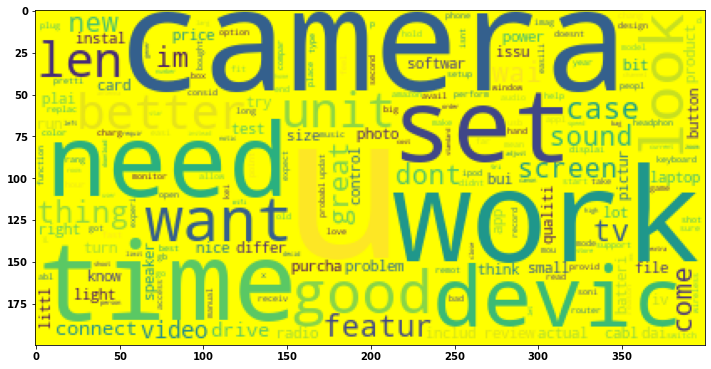

In [95]:
cluster_data = df[df['cluster']==0]
wc = WordCloud(background_color='yellow').generate(' '.join(cluster_data['review']))
plt.figure(figsize=(12, 9))
plt.imshow(wc)

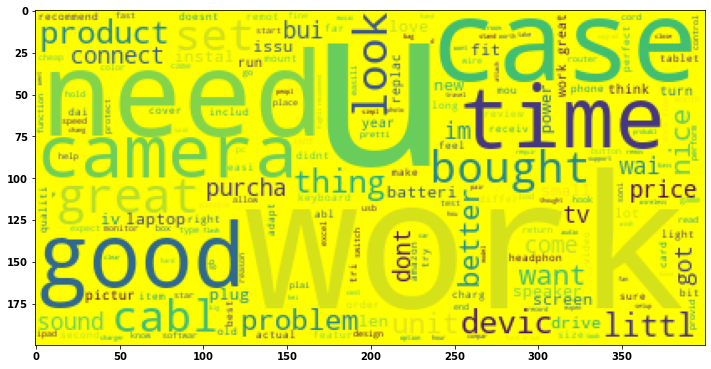

In [96]:
cluster_data = df[df['cluster']==3]
wc = WordCloud(background_color='yellow').generate(' '.join(cluster_data['review']))
plt.figure(figsize=(12, 9))
plt.imshow(wc)